In [1]:
import pandas as pd 
data = pd.read_csv("/content/drive/MyDrive/ITI/prep/italy-covid-daywise.csv")
data.head()

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [2]:
rows = data.shape[0]
columns = data.shape[1]
print(rows,columns)

248 4


In [3]:
data.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [5]:
new_cases = data[["date","new_cases"]]
new_cases.head()

,date,new_cases
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0


In [6]:
new_cases[new_cases.new_cases > 1000]

,date,new_cases
68,2020-03-08,1247.0
69,2020-03-09,1492.0
70,2020-03-10,1797.0
72,2020-03-12,2313.0
73,2020-03-13,2651.0
...,...,...
241,2020-08-28,1409.0
242,2020-08-29,1460.0
243,2020-08-30,1444.0
244,2020-08-31,1365.0


In [7]:
data["positive_rate"] = data["new_cases"] / data["new_tests"]
data.head()

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN


In [8]:
data.drop("positive_rate",axis=1,inplace=True)

In [11]:
data.sort_values('new_cases', ascending=False,inplace=True)
data.head()

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN


In [12]:
data.date.dtype

dtype('O')

In [13]:
data['date'] = pd.to_datetime(data.date)

In [16]:
data.date.dtype

dtype('<M8[ns]')

In [24]:
data['day'] = data['date'].apply(lambda x: str(x).strip().split('-')[2][:2])
data['month']= data['date'].apply(lambda x: str(x).strip().split('-')[1])
data['year']= data['date'].apply(lambda x: str(x).strip().split('-')[0])
data['weekday']= data['date'].apply(lambda x: x.strftime('%A'))

In [25]:
data.head()

,date,new_cases,new_deaths,new_tests,day,month,year,weekday
82,2020-03-22,6557.0,795.0,NaN,22,03,2020,Sunday
87,2020-03-27,6153.0,660.0,NaN,27,03,2020,Friday
81,2020-03-21,5986.0,625.0,NaN,21,03,2020,Saturday
89,2020-03-29,5974.0,887.0,NaN,29,03,2020,Sunday
88,2020-03-28,5959.0,971.0,NaN,28,03,2020,Saturday


In [28]:
data[data.month == '05'][['new_cases', 'new_deaths', 'new_tests']].sum()

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [35]:
data.groupby('weekday')[['new_cases']].sum().sort_values('new_cases',ascending=False)

,new_cases
weekday,
Sunday,43654.0
Friday,41640.0
Saturday,41503.0
Thursday,39444.0
Monday,38820.0
Wednesday,33383.0
Tuesday,33071.0


In [36]:
data_monthly = data.groupby('month')[['new_cases','new_deaths', 'new_tests']].sum()
data_monthly

,new_cases,new_deaths,new_tests
month,,,
01,3.0,0.0,0.0
02,885.0,21.0,0.0
03,100851.0,11570.0,0.0
04,101852.0,16091.0,419591.0
05,29073.0,5658.0,1078720.0
06,7772.0,1404.0,830354.0
07,6722.0,388.0,797692.0
08,21060.0,345.0,1098704.0
09,3297.0,20.0,54395.0


[Text(0, 0, '2020-03-22 00:00:00'),
 Text(0, 0, '2020-03-27 00:00:00'),
 Text(0, 0, '2020-03-21 00:00:00'),
 Text(0, 0, '2020-03-29 00:00:00'),
 Text(0, 0, '2020-03-28 00:00:00'),
 Text(0, 0, '2020-03-23 00:00:00'),
 Text(0, 0, '2020-03-20 00:00:00'),
 Text(0, 0, '2020-03-25 00:00:00'),
 Text(0, 0, '2020-03-30 00:00:00')]

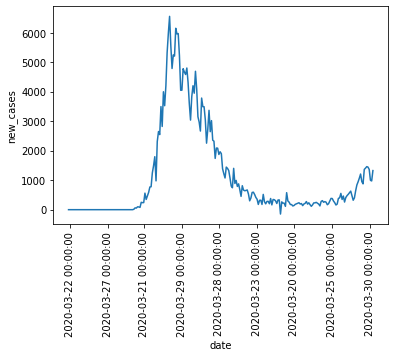

In [45]:
import seaborn as sns
#y = lambda x: str(x).split(" ")
ax = sns.lineplot(data=data,x='date',y='new_cases')
ax.set_xticklabels(data.date,rotation=90)